In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse


# Prepare object points

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 7
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)

# Depth camera calibration

Start finding chessboard corners of depth image...
find the chessboard corners of depth_chessboard_data\01.png
find the chessboard corners of depth_chessboard_data\02.png
find the chessboard corners of depth_chessboard_data\03.png
find the chessboard corners of depth_chessboard_data\04.png
find the chessboard corners of depth_chessboard_data\05.png
find the chessboard corners of depth_chessboard_data\06.png


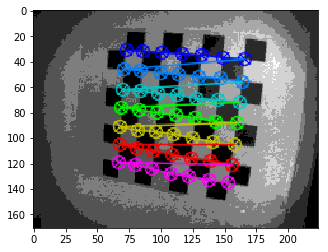

In [3]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


img_size = (10, 10)

# Make a list of calibration images
images = glob.glob('depth_chessboard_data/*.png')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of depth image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)
        

In [4]:
print('Depth Camera calibration by recorded IR image...')
img_size = (img.shape[1], img.shape[0])
# You need to comment these functions and write your calibration function from scratch.
# Notice that rvecs is rotation vector, not the rotation matrix, and tvecs is translation vector.
# In practice, you'll derive extrinsics matrixes directly. The shape must be [pts_num,3,4], and use them to plot.
print(len(objpoints), len(imgpoints))
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
Vr = np.array(rvecs)
Tr = np.array(tvecs)
extrinsics = np.concatenate((Vr, Tr), axis=1).reshape(-1,6)
print(mtx)

Depth Camera calibration by recorded IR image...
6 6
[[225.95327791   0.         113.54567545]
 [  0.         226.8806874   82.11407716]
 [  0.           0.           1.        ]]


# RGB camrea calibration

Start finding chessboard corners of RGB image...
find the chessboard corners of camera_chessboard_data\2020-01-31_17-23-19.jpg
find the chessboard corners of camera_chessboard_data\2020-01-31_17-23-23.jpg
find the chessboard corners of camera_chessboard_data\2020-01-31_17-23-26.jpg
find the chessboard corners of camera_chessboard_data\2020-01-31_17-23-30.jpg
find the chessboard corners of camera_chessboard_data\2020-01-31_17-23-34.jpg
find the chessboard corners of camera_chessboard_data\2020-01-31_17-23-37.jpg


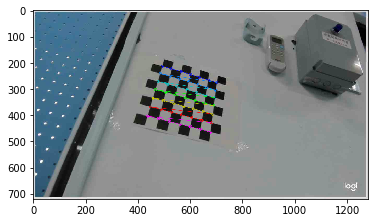

In [5]:
RGBobjpoints = []
RGBimgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_chessboard_data/*.jpg')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of RGB image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)
#     print(len(corners))

    # If found, add object points, image points
    if ret == True:
        RGBobjpoints.append(objp)
        RGBimgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)
        

In [6]:
print('Camera calibration by recorded RGB image...')
# You need to comment these functions and write your calibration function from scratch.
# Notice that rvecs is rotation vector, not the rotation matrix, and tvecs is translation vector.
# In practice, you'll derive extrinsics matrixes directly. The shape must be [pts_num,3,4], and use them to plot.
print(len(RGBobjpoints), len(RGBimgpoints))
ret, RGB_mtx, RGB_dist, RGB_rvecs, RGB_tvecs = cv2.calibrateCamera(RGBobjpoints, RGBimgpoints, img_size,None,None)
RGB_Vr = np.array(RGB_rvecs)
RGB_Tr = np.array(RGB_tvecs)
RGB_extrinsics = np.concatenate((RGB_Vr, RGB_Tr), axis=1).reshape(-1,6)
print(RGB_mtx)

Camera calibration by recorded RGB image...
6 6
[[928.99493652   0.         607.80005763]
 [  0.         875.95398006 364.52034939]
 [  0.           0.           1.        ]]


# stereoCalibrate

In [7]:
print('=== Result ===')
ret, depth_cam_int, depth_cam_dist, RGB_cam_int, RGB_cam_dist, depth_rgb_rmat, depth_rgb_tvec, E, F = cv2.stereoCalibrate(
    objpoints, imgpoints, RGBimgpoints, mtx, dist, RGB_mtx, RGB_dist, None)

print('  RMS :', ret)
print('  Depth Camera intrinsic parameters :')
print(depth_cam_int, '    ')
print('  Depth Camera distortion parameters :')
print(depth_cam_dist, '    ')
print('  RGB Camera intrinsic parameters :')
print(RGB_cam_int, '    ')
print('  RGB Camera distortion parameters :')
print(RGB_cam_dist, '    ')
print('  Rotation matrix / translation vector from depth camera to RGB camera')
print('  (they translate points from depth camera coord to RGB camera coord) :')
print(depth_rgb_rmat, '    ')
print(depth_rgb_tvec, '    ')
print()

=== Result ===
  RMS : 1.1987928027685624
  Depth Camera intrinsic parameters :
[[225.95327791   0.         113.54567545]
 [  0.         226.8806874   82.11407716]
 [  0.           0.           1.        ]]     
  Depth Camera distortion parameters :
[[ 8.36376665e-01 -1.86481135e+01 -5.76552239e-03  9.08264787e-03
   9.40544144e+01]]     
  RGB Camera intrinsic parameters :
[[928.99493652   0.         607.80005763]
 [  0.         875.95398006 364.52034939]
 [  0.           0.           1.        ]]     
  RGB Camera distortion parameters :
[[ 1.45689140e+00 -5.35147568e+01  9.24864057e-03 -1.72092521e-02
   5.78795536e+02]]     
  Rotation matrix / translation vector from depth camera to RGB camera
  (they translate points from depth camera coord to RGB camera coord) :
[[ 0.83574465  0.00700604 -0.54907358]
 [ 0.28998644  0.8434853   0.45215088]
 [ 0.46630328 -0.53710657  0.70290667]]     
[[ 7.55663553]
 [-7.31348392]
 [13.98661696]]     



In [8]:
import camera_calibration_show_extrinsics as show

Show the camera extrinsics


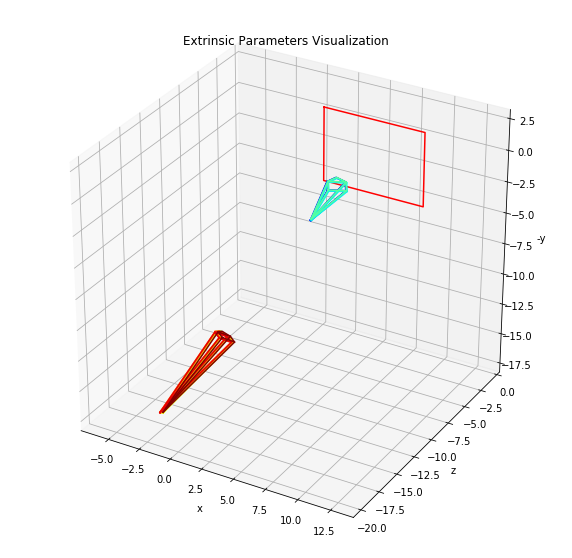

In [9]:
# show the camera extrinsics
print('Show the camera extrinsics')
# plot setting
# You can modify it for better visualization
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
# camera setting
camera_matrix = mtx
cam_width = 0.064/0.1
cam_height = 0.032/0.1
scale_focal = 1600
# chess board setting
board_width = 8
board_height = 6
square_size = 1

Allextrinsics = np.zeros((extrinsics.shape[0]+RGB_extrinsics.shape[0],6))
Allextrinsics[:extrinsics.shape[0]] = extrinsics
Allextrinsics[extrinsics.shape[0]:] = RGB_extrinsics

# display
# True -> fix board, moving cameras
# False -> fix camera, moving boards
min_values, max_values = show.draw_camera_boards(ax, camera_matrix, cam_width, cam_height,
                                                scale_focal, Allextrinsics, board_width,
                                                board_height, square_size, True)
X_min = min_values[0]
X_max = max_values[0]
Y_min = min_values[1]
Y_max = max_values[1]
Z_min = min_values[2]
Z_max = max_values[2]
max_range = np.array([X_max-X_min, Y_max-Y_min, Z_max-Z_min]).max() / 2.0

mid_x = (X_max+X_min) * 0.5
mid_y = (Y_max+Y_min) * 0.5
mid_z = (Z_max+Z_min) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, 0)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('-y')
ax.set_title('Extrinsic Parameters Visualization')
plt.show()

In [10]:
fs = cv2.FileStorage('calibration_result.xml', cv2.FILE_STORAGE_WRITE)
fs.write('rms', ret)
fs.write('depth_cam_int', depth_cam_int)
fs.write('depth_cam_dist', depth_cam_dist)
fs.write('RGB_cam_int', RGB_cam_int)
fs.write('RGB_cam_dist', RGB_cam_dist)
fs.write('depth_rgb_rmat', depth_rgb_rmat)
fs.write('depth_rgb_tvec', depth_rgb_tvec)
fs.release()

In [11]:
#  !jupyter nbconvert --to script Calibration_depth_and_rgb_by_image.ipynb

In [12]:
# def main():
#     parser = argparse.ArgumentParser(
#         description='Calibrate pro-cam system using chessboard and structured light projection\n'
#         '  Place captured images as \n'
#         '    ./ --- capture_1/ --- graycode_00.png\n'
#         '        |              |- graycode_01.png\n'
#         '        |              |        .\n'
#         '        |              |        .\n'
#         '        |              |- graycode_??.png\n'
#         '        |- capture_2/ --- graycode_00.png\n'
#         '        |              |- graycode_01.png\n'
#         '        |      .       |        .\n'
#         '        |      .       |        .\n',
#         formatter_class=argparse.RawTextHelpFormatter
#     )

#     parser.add_argument('proj_height', type=int, help='projector pixel height')
#     parser.add_argument('proj_width', type=int, help='projector pixel width')
#     parser.add_argument('chess_vert', type=int,
#                         help='number of cross points of chessboard in vertical direction')
#     parser.add_argument('chess_hori', type=int,
#                         help='number of cross points of chessboard in horizontal direction')
#     parser.add_argument('chess_block_size', type=float,
#                         help='size of blocks of chessboard (mm or cm or m)')
#     parser.add_argument('graycode_step', type=int,
#                         default=1, help='step size of graycode')
#     parser.add_argument('-black_thr', type=int, default=40,
#                         help='threashold to determine whether a camera pixel captures projected area or not (default : 40)')
#     parser.add_argument('-white_thr', type=int, default=5,
#                         help='threashold to specify robustness of graycode decoding (default : 5)')

#     args = parser.parse_args()

#     proj_shape = (args.proj_height, args.proj_width)
#     chess_shape = (args.chess_vert, args.chess_hori)
#     chess_block_size = args.chess_block_size
#     gc_step = args.graycode_step
#     black_thr = args.black_thr
#     white_thr = args.white_thr

#     dirnames = sorted(glob.glob('./capture_*'))
#     if len(dirnames) == 0:
#         print('Directories \'./capture_*\' were not found')
#         return

#     print('Searching input files ...')
#     used_dirnames = []
#     gc_fname_lists = []
#     for dname in dirnames:
#         gc_fnames = sorted(glob.glob(dname + '/graycode_*'))
#         if len(gc_fnames) == 0:
#             continue
#         used_dirnames.append(dname)
#         gc_fname_lists.append(gc_fnames)
#         print(' \'' + dname + '\' was found')

#     proj_objps_list, proj_corners_list = calibrate(used_dirnames, gc_fname_lists,
#               proj_shape, chess_shape, chess_block_size, gc_step, black_thr, white_thr)
    
#     print('Initial solution of projector\'s parameters')
#     ret, proj_int, proj_dist, proj_rvecs, proj_tvecs = cv2.calibrateCamera(
#         proj_objps_list, proj_corners_list, proj_shape, None, None, None, None)
#     print('  RMS :', ret)
#     print('  Intrinsic parameters :')
#     printNumpyWithIndent(proj_int, '    ')
#     print('  Distortion parameters :')
#     printNumpyWithIndent(proj_dist, '    ')
#     print()

#     print('=== Result ===')
#     ret, cam_int, cam_dist, proj_int, proj_dist, cam_proj_rmat, cam_proj_tvec, E, F = cv2.stereoCalibrate(
#         proj_objps_list, imgpoints, proj_corners_list, mtx, dist, proj_int, proj_dist, None)
#     print('  RMS :', ret)
#     print('  Camera intrinsic parameters :')
#     printNumpyWithIndent(cam_int, '    ')
#     print('  Camera distortion parameters :')
#     printNumpyWithIndent(cam_dist, '    ')
#     print('  Projector intrinsic parameters :')
#     printNumpyWithIndent(proj_int, '    ')
#     print('  Projector distortion parameters :')
#     printNumpyWithIndent(proj_dist, '    ')
#     print('  Rotation matrix / translation vector from camera to projector')
#     print('  (they translate points from camera coord to projector coord) :')
#     printNumpyWithIndent(cam_proj_rmat, '    ')
#     printNumpyWithIndent(cam_proj_tvec, '    ')
#     print()

In [13]:
# def calibrate(dirnames, gc_fname_lists, proj_shape, chess_shape, chess_block_size, gc_step, black_thr, white_thr):
#     objps = np.zeros((chess_shape[0]*chess_shape[1], 3), np.float32)
#     objps[:, :2] = chess_block_size * \
#         np.mgrid[0:chess_shape[0], 0:chess_shape[1]].T.reshape(-1, 2)

#     print('Calibrating ...')
#     gc_height = int((proj_shape[0]-1)/gc_step)+1
#     gc_width = int((proj_shape[1]-1)/gc_step)+1
#     graycode = cv2.structured_light_GrayCodePattern.create(
#         gc_width, gc_height)
#     graycode.setBlackThreshold(black_thr)
#     graycode.setWhiteThreshold(white_thr)

#     cam_shape = cv2.imread(gc_fname_lists[0][0], cv2.IMREAD_GRAYSCALE).shape
#     patch_size_half = int(np.ceil(cam_shape[1] / 180))
#     print('  patch size :', patch_size_half * 2 + 1)

#     cam_corners_list = []
#     cam_objps_list = []
#     cam_corners_list2 = []
#     proj_objps_list = []
#     proj_corners_list = []
#     for dname, gc_filenames in zip(dirnames, gc_fname_lists):
#         print('  checking \'' + dname + '\'')
#         if len(gc_filenames) != graycode.getNumberOfPatternImages() + 2:
#             print('Error : invalid number of images in \'' + dname + '\'')
#             return None

#         imgs = []
#         for fname in gc_filenames:
#             img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
#             if cam_shape != img.shape:
#                 print('Error : image size of \'' + fname + '\' is mismatch')
#                 return None
#             imgs.append(img)
#         black_img = imgs.pop()
#         white_img = imgs.pop()

#         res, cam_corners = cv2.findChessboardCorners(white_img, chess_shape)
#         if not res:
#             print('Error : chessboard was not found in \'' +
#                   gc_filenames[-2] + '\'')
#             return None
#         cam_objps_list.append(objps)
#         cam_corners_list.append(cam_corners)

#         proj_objps = []
#         proj_corners = []
#         cam_corners2 = []
#         # viz_proj_points = np.zeros(proj_shape, np.uint8)
#         for corner, objp in zip(cam_corners, objps):
#             c_x = int(round(corner[0][0]))
#             c_y = int(round(corner[0][1]))
#             src_points = []
#             dst_points = []
#             for dx in range(-patch_size_half, patch_size_half + 1):
#                 for dy in range(-patch_size_half, patch_size_half + 1):
#                     x = c_x + dx
#                     y = c_y + dy
#                     if int(white_img[y, x]) - int(black_img[y, x]) <= black_thr:
#                         continue
#                     err, proj_pix = graycode.getProjPixel(imgs, x, y)
#                     if not err:
#                         src_points.append((x, y))
#                         dst_points.append(gc_step*np.array(proj_pix))
#             if len(src_points) < patch_size_half**2:
#                 print(
#                     '    Warning : corner', c_x, c_y,
#                     'was skiped because decoded pixels were too few (check your images and threasholds)')
#                 continue
#             h_mat, inliers = cv2.findHomography(
#                 np.array(src_points), np.array(dst_points))
#             point = h_mat@np.array([corner[0][0], corner[0][1], 1]).transpose()
#             point_pix = point[0:2]/point[2]
#             proj_objps.append(objp)
#             proj_corners.append([point_pix])
#             cam_corners2.append(corner)
#             # viz_proj_points[int(round(point_pix[1])),
#             #                 int(round(point_pix[0]))] = 255
#         if len(proj_corners) < 3:
#             print('Error : too few corners were found in \'' +
#                   dname + '\' (less than 3)')
#             return None
#         proj_objps_list.append(np.float32(proj_objps))
#         proj_corners_list.append(np.float32(proj_corners))
#         cam_corners_list2.append(np.float32(cam_corners2))
        
#     return proj_objps_list, proj_corners_list

In [14]:
# def printNumpyWithIndent(tar, indentchar):
#     print(indentchar + str(tar).replace('\n', '\n' + indentchar))